### 1. Табличные данные и Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('end_seminar.xlsx')

In [3]:
df.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      361 non-null    datetime64[ns]
 1   id             361 non-null    object        
 2   rating         361 non-null    int64         
 3   18_group       223 non-null    float64       
 4   is_mi          18 non-null     float64       
 5   fall_1         361 non-null    object        
 6   fall_2         361 non-null    object        
 7   fall_3         361 non-null    object        
 8   spring_1       361 non-null    object        
 9   spring_2       361 non-null    object        
 10  spring_3       361 non-null    object        
 11  is_first_time  359 non-null    object        
 12  percentile     361 non-null    float64       
 13  17_group       138 non-null    float64       
 14  blended        138 non-null    object        
 15  is_ml_student  57 non-n

In [5]:
df['17_group'].unique()

array([ nan, 172., 176., 171., 175., 173., 174., 177.])

Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
Есть ли студенты с равными перцентилями?

In [6]:
df['percentile'].is_unique

False

In [7]:
df['18_group'].notna().sum()

223

In [8]:
df['17_group'].notna().sum()

138

Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [9]:
df.isna().sum().where(lambda x: x>0).dropna()

18_group         138.0
is_mi            343.0
is_first_time      2.0
17_group         223.0
blended          223.0
is_ml_student    304.0
dtype: float64

In [10]:
df.fillna(value={
    'is_first_time':'',
    'blended':'',
    '18_group':0,
    'is_mi':0,
    '17_group':0,
    'is_ml_student':0}, inplace=True)

Посмотрите повнимательнее на колонку 'is_first_time'.
Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию.

In [11]:
df['is_first_time'].value_counts()

Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

In [12]:
# удаляем все кроме самой последней записи для каждого id
df = df.sort_values(by='timestamp').drop_duplicates(subset='id', keep='last')

In [13]:
df['is_first_time'].value_counts()

Да     294
Нет     51
         2
Name: is_first_time, dtype: int64

In [14]:
# разделение студентов на 4 и 3 курс
df17 = df[df['17_group'] > 0]
df18 = df[df['18_group'] > 0]

In [15]:
df17.shape

(134, 16)

Какие blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом?

In [16]:
# список blended-курсов
df17['blended'].unique()

array(['DevOps', 'Введение в дифференциальную геометрию',
       'Соревновательный анализ данных'], dtype=object)

In [17]:
# количество студентов на курсе, сортировка от самого популярного курса
df17.groupby('blended')['id'].count().sort_values(ascending=False)

blended
DevOps                                   87
Соревновательный анализ данных           32
Введение в дифференциальную геометрию    15
Name: id, dtype: int64

In [18]:
# средний рейтинг студентов на курсах
df17.groupby('blended')['rating'].mean().sort_values(ascending=False)

blended
Введение в дифференциальную геометрию    1210.733333
DevOps                                   1154.172414
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

In [19]:
# для того, чтобы это выглядело понятно, желательн
dfn = df.groupby(by=['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])['id'].count()
dfn = dfn[dfn > 1]
dfn

fall_1                                           fall_2                                           fall_3                                           spring_1                                                spring_2                                     spring_3                                     blended
Statistical Learning Theory                      Анализ неструктурированных данных                Сбор и обработка данных с помощью краудсорсинга  Обучение с подкреплением                                Конфликты и кооперация                       Компьютерное зрение                          DevOps     2
Байесовские методы машинного обучения            Анализ неструктурированных данных                Глубинное обучение в обработке звука             Обучение с подкреплением                                Генеративные модели в машинном обучении      Компьютерное зрение                          DevOps     2
                                                                                       

In [20]:
# количество повторяющихся наборов курсов
dfn.shape[0]

15

In [21]:
# чуть более понятный вывод наборов курсов
dfn.to_excel('courses.xlsx')
for i in dfn.iteritems():
    for course in i[0]:
        print(course)
    print('Количество студентов: {0}'.format(i[1]))
    print('***')

Statistical Learning Theory
Анализ неструктурированных данных
Сбор и обработка данных с помощью краудсорсинга
Обучение с подкреплением
Конфликты и кооперация
Компьютерное зрение
DevOps
Количество студентов: 2
***
Байесовские методы машинного обучения
Анализ неструктурированных данных
Глубинное обучение в обработке звука
Обучение с подкреплением
Генеративные модели в машинном обучении
Компьютерное зрение
DevOps
Количество студентов: 2
***
Байесовские методы машинного обучения
Анализ неструктурированных данных
Сбор и обработка данных с помощью краудсорсинга
Обучение с подкреплением
Компьютерное зрение
Генеративные модели в машинном обучении
DevOps
Количество студентов: 2
***
Безопасность компьютерных систем
Statistical Learning Theory
Матричные вычисления
Дискретная оптимизация
Промышленное программирование на языке Java
Дополнительные главы прикладной статистики

Количество студентов: 3
***
Безопасность компьютерных систем
Высокопроизводительные вычисления
Анализ неструктурированных дан

Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [22]:
# (???)
def courses_list(df, cols):
    temp = []
    #cols = ['fall_1','fall_2','fall_3','spring_1','spring_2','spring_3']
    for c in cols:
        temp += list(df[c].unique())
    return set(temp)

In [23]:
c17 = courses_list(df17,['fall_1','fall_2','fall_3','spring_1','spring_2','spring_3'])
c18 = courses_list(df18,['fall_1','fall_2','fall_3','spring_1','spring_2','spring_3'])

In [24]:
set.intersection(c17, c18)

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [25]:
# уникальные курсы для 18 набора
set.difference(c18, c17)

{'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

In [26]:
# уникальные курсы для 17 набора
set.difference(c17, c18)

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления'}

Постройте график средних рейтингов по дням получения ответов (bar plot).

In [27]:
#df.groupby(by=[df.timestamp.day])['rating'].mean()
rating_per_day = df.groupby(pd.Grouper(key='timestamp',freq='D'))['rating'].mean()

In [28]:
import matplotlib.pyplot as plt

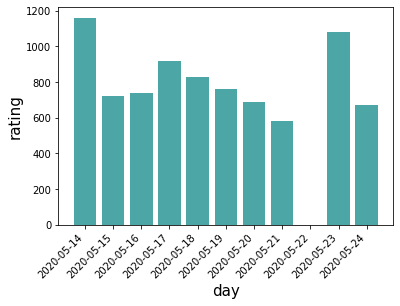

In [29]:
plt.bar(rating_per_day.index, rating_per_day.values, alpha=0.7, color='teal')
plt.xlabel('day', fontsize=15)
plt.ylabel('rating', fontsize=15)
plt.xticks(rating_per_day.index, rotation=45, ha='right')
# второй аргумент тут фиксит срезание текста при сохранении:
plt.savefig('rating_per_day.pdf', bbox_inches='tight')

In [30]:
import plotly.express as px

In [31]:
# такой же график через plotly
fig = px.bar(rating_per_day, labels={'timestamp':'day','value':'rating'})
fig.show()

### 2. Распределение студентов по курсам.

2.0 Проверка

In [32]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

2.1 Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

Соответствие номеров групп специализациям:
171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
181, 182 - МОП; 183 - ТИ; 184 - АДИС; 185, 186 - РС; 187 - АПР; 188 - МИ

По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса.

In [33]:
df = df.assign(courses_num_fall = df['17_group'].apply(lambda x: 2\
    if x in [171,172,173] else 0) + df['is_mi'].apply(lambda x: 2\
    if x == True else 0))

In [34]:
df['courses_num_fall'] = df['courses_num_fall'].apply(lambda x: 1 if x == 0 else 2)

Проверка

In [35]:
col_name = 'courses_num_fall'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

In [36]:
c_fall = courses_list(df, ['fall_1','fall_2','fall_3'])

In [37]:
# словарь, в котором хранится количество свободных мест для каждого курса
vacancies = {}
for c in c_fall:
    max_st_num = 30
    if c in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
        max_st_num = 60
    elif c == 'Анализ неструктурированных данных':
        max_st_num = 999
    vacancies[c] = max_st_num

In [38]:
# удаляем дублирование курсов

df.loc[df['fall_2'] == df['fall_3'], 'fall_3'] = '-'
df.loc[df['fall_1'] == df['fall_2'], 'fall_2'] = '-'
df.loc[df['fall_1'] == df['fall_3'], 'fall_3'] = '-'

In [39]:
# распределение студентов по первой волне

df['courses_num_fall_alloc'] = 0


df_res = pd.DataFrame(columns=['id','course'])

for c in vacancies:
    
    df1_temp = df[df['fall_1'] == c]
    df2_temp = df[(df['fall_2'] == c) & (df['courses_num_fall'] == 2)]
    df_temp = pd.concat([df1_temp, df2_temp], ignore_index=True)
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]
    
    df['courses_num_fall_alloc'] = df['courses_num_fall_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    # новое число свободных мест на курсе (после текущей волны)
    vacancies[c] -= df_temp.shape[0]

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# удаляем курсы, на которые не осталось свободных мест
vacancies = {key:val for key, val in vacancies.items() if val != 0}

In [ ]:
# распределение студентов по второй волне
for c in vacancies:
    df1_temp = df[(df['fall_2'] == c) & (df['courses_num_fall'] == 1)]
    df2_temp = df[(df['fall_3'] == c) & (df['courses_num_fall'] == 2)]
    df_temp = pd.concat([df1_temp, df2_temp], ignore_index=True)
    df_temp = df_temp[df_temp['courses_num_fall'] != df_temp['courses_num_fall_alloc']]
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]#False

    df['courses_num_fall_alloc'] = df['courses_num_fall_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    vacancies[c] -= df_temp.shape[0]

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# удаляем курсы, на которые не осталось свободных мест
vacancies = {key:val for key, val in vacancies.items() if val != 0}

In [ ]:
# распределение студентов по третьей волне
for c in vacancies:
    
    df_temp = df[(df['fall_3'] == c) & (df['courses_num_fall'] == 1)]
    df_temp = df_temp[df_temp['courses_num_fall'] != df_temp['courses_num_fall_alloc']]
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]

    df['courses_num_fall_alloc'] = df['courses_num_fall_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# распределяем курсы в два столбца
dfgb = df_res.groupby(by='id')
df_res_2col = pd.DataFrame()
df_res_2col = dfgb.first()
df_res_2col['course2'] = dfgb.last()['course']

In [ ]:
df_with_courses = df.merge(right=df_res_2col, left_on='id',right_index=True, how='outer')

In [ ]:
# заполнение пропусков как указано в задании
df_with_courses.loc[df_with_courses['courses_num_fall_alloc'] == 0, 'course'] = '???'
df_with_courses.loc[df_with_courses['courses_num_fall'] == 1, 'course2'] = '-'
df_with_courses.loc[(df_with_courses['courses_num_fall'] == 2) & (df_with_courses['courses_num_fall_alloc'] < 2), 'course2'] = '???'

In [ ]:
res_final = pd.DataFrame(df_with_courses['id'])
res_final.rename({'id':'ID'}, axis=1, inplace=True)

In [ ]:

res_final['course1'] = df_with_courses['course']
res_final['course2'] = df_with_courses['course2']

In [ ]:
res_final.loc[res_final['course1'] == res_final['course2'], 'course2'] = '???'

In [ ]:
res_final.to_csv('res_fall.csv', index=None)

### 3 Весенние курсы

In [ ]:
df = df.assign(courses_num_spring = df['17_group'].apply(lambda x: 2\
    if x in [171,172,173] else 1))

In [ ]:
c_spring = courses_list(df, ['spring_1','spring_2','spring_3'])

In [ ]:
vacancies = {}
for c in c_spring:
    if c in ['Обучение с подкреплением', 'Анализ данных в бизнесе']:
        max_st_num = 60
    else:
        max_st_num = 30
    vacancies[c] = max_st_num

In [ ]:


# # Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2
# df.loc[(df['spring_1'] == 'Машинное обучение 2') & (df['17_group'].isin([171,172])), 'spring_1'] = '--'
# df.loc[(df['spring_2'] == 'Машинное обучение 2') & (df['17_group'].isin([171,172])), 'spring_2'] = '--'
# df.loc[(df['spring_3'] == 'Машинное обучение 2') & (df['17_group'].isin([171,172])), 'spring_3'] = '--'
# df.loc[(df['spring_1'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_1'] = '--'
# df.loc[(df['spring_2'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_2'] = '--'
# df.loc[(df['spring_3'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_3'] = '--'

df.loc[(df['spring_3'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_3'] = '---'
df.loc[(df['spring_2'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_2'] = df['spring_3']
df.loc[(df['spring_1'] == 'Машинное обучение 2') & (df['18_group'].isin([181,182])), 'spring_1'] = df['spring_2']


df.loc[df['spring_1'] == df['spring_3'], 'spring_3'] = '--'
df.loc[df['spring_2'] == df['spring_3'], 'spring_3'] = '--'
df.loc[df['spring_1'] == df['spring_2'], 'spring_2'] = '--'


In [ ]:
df.to_excel('temp1.xlsx')

In [ ]:
# распределение студентов по первой волне

df['courses_num_spring_alloc'] = 0


df_res = pd.DataFrame(columns=['id','course'])

for c in vacancies:
    
    df1_temp = df[df['spring_1'] == c]
    df2_temp = df[(df['spring_2'] == c) & (df['courses_num_spring'] == 2)]
    df_temp = pd.concat([df1_temp, df2_temp], ignore_index=True)
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]
    
    df['courses_num_spring_alloc'] = df['courses_num_spring_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    # новое число свободных мест на курсе (после текущей волны)
    vacancies[c] -= df_temp.shape[0]

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# удаляем курсы, на которые не осталось свободных мест
vacancies = {key:val for key, val in vacancies.items() if val != 0}

In [ ]:
# распределение студентов по второй волне
for c in vacancies:
    df1_temp = df[(df['spring_2'] == c) & (df['courses_num_spring'] == 1)]
    df2_temp = df[(df['spring_3'] == c) & (df['courses_num_spring'] == 2)]
    df_temp = pd.concat([df1_temp, df2_temp], ignore_index=True)
    df_temp = df_temp[df_temp['courses_num_spring'] != df_temp['courses_num_spring_alloc']]
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]#False

    df['courses_num_spring_alloc'] = df['courses_num_spring_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    vacancies[c] -= df_temp.shape[0]

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# удаляем курсы, на которые не осталось свободных мест
vacancies = {key:val for key, val in vacancies.items() if val != 0}

In [ ]:
# распределение студентов по третьей волне
for c in vacancies:
    
    df_temp = df[(df['spring_3'] == c) & (df['courses_num_spring'] == 1)]
    df_temp = df_temp[df_temp['courses_num_spring'] != df_temp['courses_num_spring_alloc']]
    df_temp = df_temp.sort_values(by='percentile', ascending=True)[:vacancies[c]]

    df['courses_num_spring_alloc'] = df['courses_num_spring_alloc'] + df['id'].isin(df_temp['id'].values)
    df_temp['course'] = c

    df_res = pd.concat([df_res, df_temp[['id','course']]])


In [ ]:
# распределяем курсы в два столбца
dfgb = df_res.groupby(by='id')
df_res_2col = pd.DataFrame()
df_res_2col = dfgb.first()
df_res_2col['course2'] = dfgb.last()['course']

In [ ]:
df_with_courses = df.merge(right=df_res_2col, left_on='id', right_index=True, how='outer')

In [ ]:
# заполнение пропусков как указано в задании
df_with_courses.loc[df_with_courses['courses_num_spring_alloc'] == 0, 'course'] = '???'
df_with_courses.loc[df_with_courses['courses_num_spring'] == 1, 'course2'] = '-'
df_with_courses.loc[(df_with_courses['courses_num_spring'] == 2) & (df_with_courses['courses_num_spring_alloc'] < 2), 'course2'] = '???'

In [ ]:
res_final = pd.DataFrame(df_with_courses['id'])
res_final.rename({'id':'ID'}, axis=1, inplace=True)
res_final['course1'] = df_with_courses['course']
res_final['course2'] = df_with_courses['course2']

In [ ]:
res_final.loc[res_final['course1'] == res_final['course2'], 'course2'] = '???'

In [ ]:
res_final.to_csv('res_spring.csv', index=None)